In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import math
import cmath

In [80]:
""" Problem 1 """

def truncated_svd(A, k=None):
    eigs, vecs = la.eig(A.T@A)
    singular = np.sqrt(eigs)
    
    if k == None:
        sort = np.argsort(singular) 
    else:
        sort = np.argsort(-singular)[-k:][::-1]
    
    zeros = np.nonzero(singular)
    idx = np.intersect1d(sort,zeros)
    idx = np.argsort(-singular[idx])
    
    singular = singular[idx]
    vecs = vecs[idx]
    
    V = vecs
    U = np.empty_like(A@V)
    
    m,n = U.shape
    for i in range(n):
        U[:,i] = (1/singular[i])*(A@V[:,i])
    
    return U, singular, V.T

A = np.random.random((6,4))
Uprime, Sprime, Vprime = la.svd(A)
U, S, VT = truncated_svd(A)
Sigma = np.diag(S)
print(np.allclose(U@Sigma@VT,A))

True


/Users/Deehrlich/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


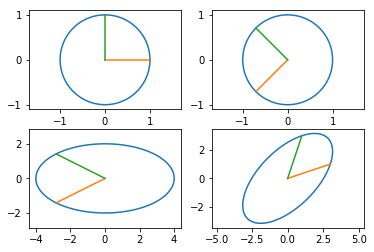

In [133]:
""" Problem 2 """

A = np.array([[3,1],[1,3]])
U, Sing, VT = la.svd(A)
Sigma = np.diag(Sing)

theta = np.linspace(0,2*np.pi,100)
x = np.cos(theta)
y = np.sin(theta)
S = np.vstack((x,y))

e1x = np.linspace(0,1,100)
e1y = np.linspace(0,0,100)
E1 = np.vstack((e1x,e1y))
               
e2x = np.linspace(0,0,100)
e2y = np.linspace(1,0,100)
E2 = np.vstack((e2x,e2y))
               
S2 = VT@S
S3 = Sigma@VT@S
S4 = U@Sigma@VT@S

E12 = VT@E1
E13 = Sigma@VT@E1
E14 = U@Sigma@VT@E1

E22 = VT@E2
E23 = Sigma@VT@E2
E24 = U@Sigma@VT@E2

plt.subplot(221)
plt.plot(S[0],S[1])
plt.plot(E1[0],E1[1])
plt.plot(E2[0],E2[1])
plt.axis("equal")

plt.subplot(222)
plt.plot(S2[0],S2[1])
plt.plot(E12[0],E12[1])
plt.plot(E22[0],E22[1])
plt.axis("equal")

plt.subplot(223)
plt.plot(S3[0],S3[1])
plt.plot(E13[0],E13[1])
plt.plot(E23[0],E23[1])
plt.axis("equal")

plt.subplot(224)
plt.plot(S4[0],S4[1])
plt.plot(E14[0],E14[1])
plt.plot(E24[0],E24[1])
plt.axis("equal")

plt.show()

In [139]:
""" Problem 3 """

def svd_approx(A, k):
    U, S, VT = la.svd(A, full_matrices=False)
    Sigma = np.diag(S[:k])
    Ahat = U[:,:k]@Sigma@VT[:k,:]
    return Ahat

In [144]:
""" Problem 4 """

def lowest_rank_approx(A,e):
    U, S, VT = la.svd(A, full_matrices=False)
    i = 0
    while S[i] > e and i <= len(S):
        i+=1
    return svd_approx(A,i)

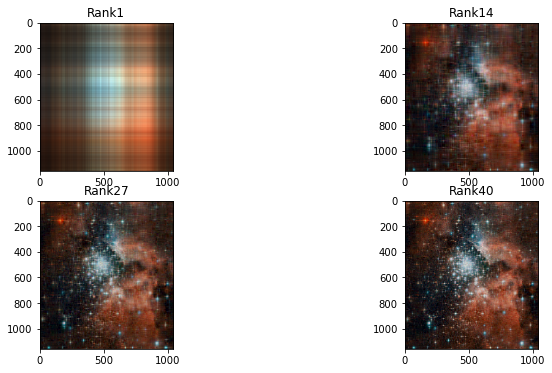

In [173]:
""" Problem 5"""

def compress_img(k, filename= "/Users/Deehrlich/Desktop/BootCamp2017/Computation/Wk3_Decomp/hubble.jpg"):
    
    X = plt.imread(filename).astype(float)
    
    R = X[:,:,0]
    G = X[:,:,1]
    B = X[:,:,2]
    
    colors = np.array([R, G, B])
    
    for i in range(len(colors)):
        colors[i] = svd_approx(colors[i],k)
        colors[i] = colors[i]/np.max(colors[i])
        colors[i][colors[i] > 1] = 1
        colors[i][colors[i] < 0] = 0
    
    Comp = np.empty_like(X)
    Comp[:,:,0] = colors[0]
    Comp[:,:,1] = colors[1]
    Comp[:,:,2] = colors[2]
    
    return Comp

rank = [1,14,27,40]
plt.figure(figsize=(12,6))
for k in range(4):
    plt.subplot(2,2,k+1)
    plt.title("Rank" + str(rank[k]))
    plt.imshow(compress_img(rank[k]))
plt.show()
    